<a href="https://colab.research.google.com/github/Alphalete-843/Personal-Portfolio-Web-Page/blob/master/Albert_Rubio_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School, Intro to Data Science Project, — Classification!

## Assignment

Run this cell to load the Titanic data:

**Predicting survival on the titanic**

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'survived'

In [0]:
train.shape, test.shape

((668, 14), (223, 14))

In [0]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,True


In [0]:
train.survived.value_counts(normalize=True)

0    0.613772
1    0.386228
Name: survived, dtype: float64

In [0]:
predictions = [1] * len(train)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(train.survived, predictions)

0.38622754491017963

In [0]:
from sklearn.metrics import confusion_matrix

def matrix(y_true, y_pred):
  data = confusion_matrix(y_true, y_pred)
  index = ['Actual 0', 'Actual 1']
  columns = ['Predicted 0', 'Predicted 1']
  return pd.DataFrame(data, index, columns)

matrix(train.survived, predictions)

,Predicted 0,Predicted 1
Actual 0,0,410
Actual 1,0,258


In [0]:
from sklearn.metrics import recall_score
recall_score(train.survived, predictions)

1.0

In [0]:
# Recall
0 / 258

0.0

In [0]:
# Accuracy
410 / (410 + 258)

0.6137724550898204

In [0]:
train[['sex', 'age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 2 columns):
sex    668 non-null object
age    668 non-null float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


In [0]:
train['female'] = train.sex == 'female'
test['female'] = test.sex == 'female'

In [0]:
train[['sex', 'female']].head()

,sex,female
105,male,False
68,female,True
253,male,False
320,male,False
706,female,True


In [0]:
train.age.isnull().sum()

0

In [0]:
train.age.mean()

29.900000000000013

In [0]:
train.age.fillna(train.age.mean(), inplace=True)
train.age.isnull().sum()

0

In [0]:
test.age.isnull().sum()

0

In [0]:
test.age.mean()

29.25681614349774

In [0]:
test.age.fillna(train.age.mean(), inplace=True)
test.age.isnull().sum()

0

Then, train a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba), [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), or [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model. Use any features and parameters you want. 

Try to get better than 78.0% accuracy on the test set! (This is not required, but encouraged.)

Do refer to the lecture notebook — but try not to copy-paste.

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

After this, you may want to try [Kaggle's Titanic challenge](https://www.kaggle.com/c/titanic)!

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
features = ['female', 'age']
target = 'survived'

model = LogisticRegression()
model.fit(train[features], train[target])

#Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7889221556886228
Test accuracy: 0.7802690582959642


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
matrix(y_true, y_pred)

,Predicted 0,Predicted 1
Actual 0,115,24
Actual 1,25,59


In [0]:
recall_score(y_true, y_pred)

0.7023809523809523

In [0]:
# Recall
59 / (59 + 25)

0.7023809523809523

In [0]:
# Accuracy
(59 + 115) / (59 + 115 + 24 + 25)

0.7802690582959642

In [0]:
model.coef_, model.intercept_

(array([[ 2.43123179, -0.00948601]]), array([-1.0976689]))

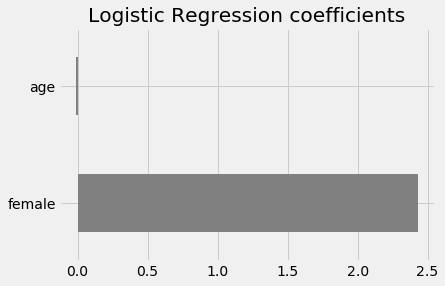

In [0]:
import matplotlib.pyplot as plt
pd.Series(model.coef_[0], features).plot.barh(color='gray')
plt.title('Logistic Regression coefficients');

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'Logistic Regression probabilities')

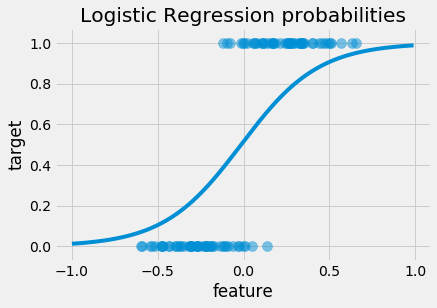

In [0]:
from sklearn.datasets import make_classification

#Generate data
x, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, class_sep=0.25, random_state=0)

model = LogisticRegression()
model.fit(x, y)
inputs = [[x/100] for x in range(-100, 100)]
predictions = model.predict_proba(inputs)[:, 1]

#plt.style.use('fivethirtyeight')
plt.scatter(x, y, s=100, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Logistic Regression probabilities')